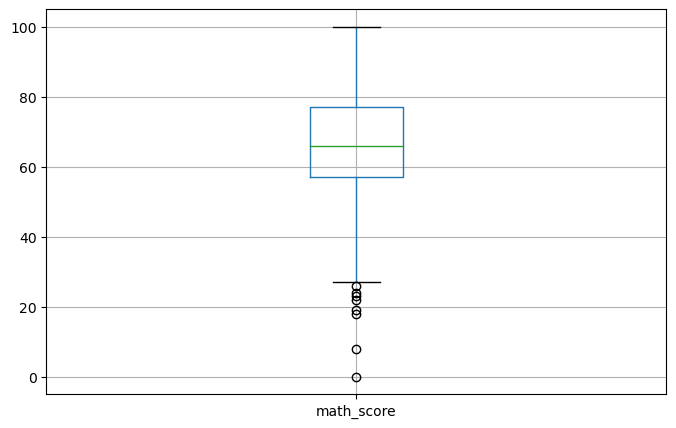

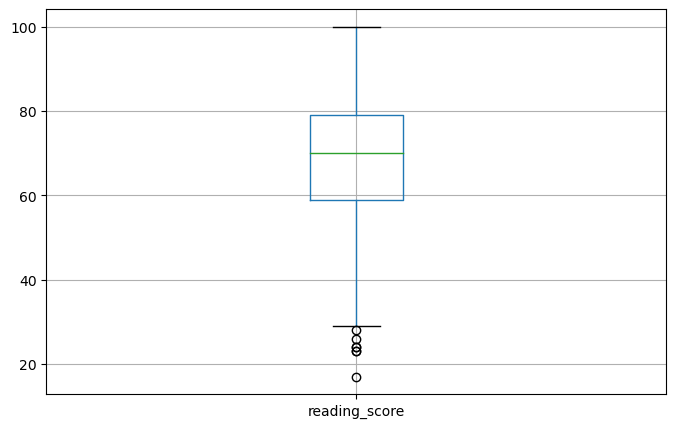

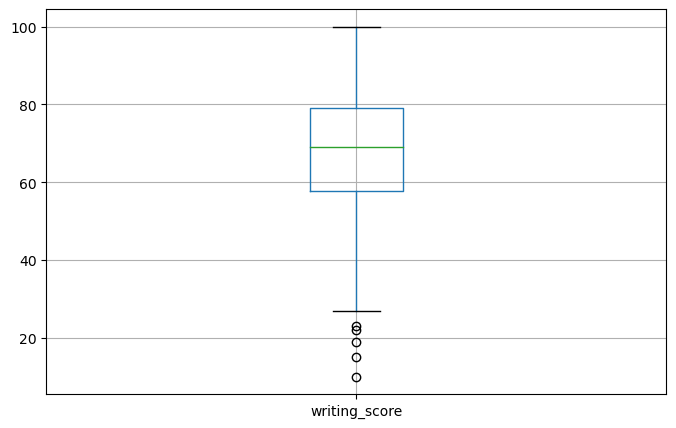

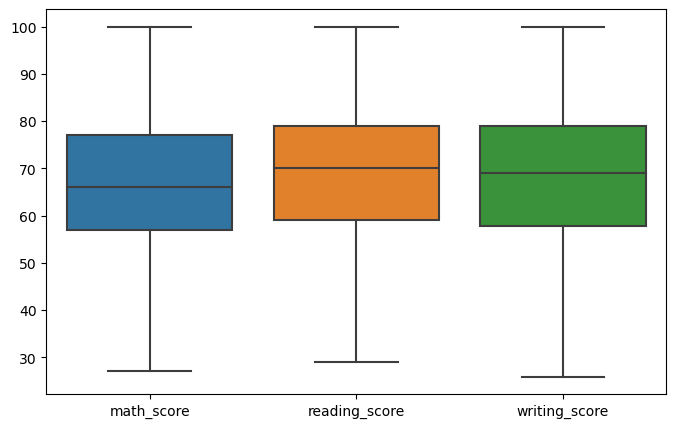

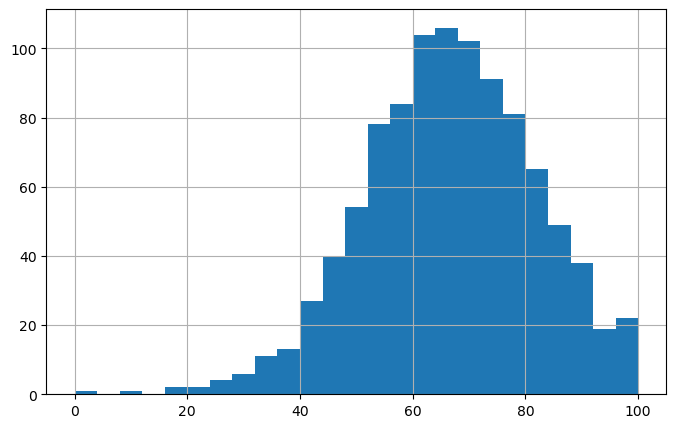

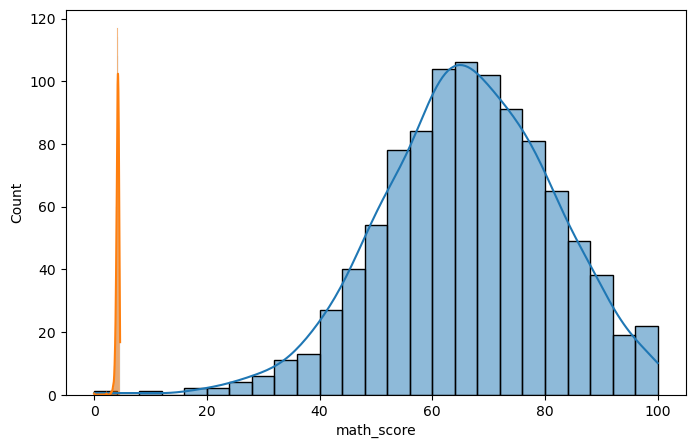

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Datasets/study_performance.csv")

data.isnull().sum()

data['reading_score'].fillna(0, inplace=True)

numeric_columns = data.columns[data.dtypes != 'O']

numeric_columns

for i in numeric_columns:
    data.boxplot(i)
    plt.show()


q1 = data[['math_score','reading_score','writing_score']].quantile(0.25)
q3 = data[['math_score','reading_score','writing_score']].quantile(0.75)

IQR = q3-q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR


clean_data = data[['math_score','reading_score','writing_score']].clip(lower = lower_bound, upper = upper_bound, axis = 1)

sns.boxplot(data = clean_data)
plt.show()

data['transformed_math_score'] = np.log1p(data['math_score'])

data['math_score'].hist(bins = 25)
plt.show()

sns.histplot(data['math_score'], kde = True)
sns.histplot(data['transformed_math_score'], kde = True)
plt.show()